# IRSALINA LAYALIA SHABRINA

# FINAL PROJECT - Graduate Admission Dataset

Data Graduate Admission diperoleh dari https://www.kaggle.com/mohansacharya/graduate-admissions. Dataset ini berkaitan dengan penerimaan pada Program Master di University of California, Los Angeles (UCLA). Parameter yang menjadi penentu peluang diterima pada program tersebut antara lain
1. GRE Scores (maks 340): Graduate Record Examination, tes masuk program master
2. TOEFL Scores (maks 120): Nilai TOEFL
3. University Rating : peringkat universitas
4. SOP: Statement of Purpose
5. LOR: Letter of Recommendation 
6. CGPA(maks 10): Undergraduate GPA 
7. Research : Pengalaman Riset
8. Chance of Admit: Peluang diterima

In [2]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#IMPORT DATA
data=pd.read_csv('F://APPLY KERJA/APPLY/DTS/BDA/FINAL PROJECT/DATA/Admission_Predict_Ver1.1.csv')
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
data.shape

(500, 8)

Data terdiri dari 500 observasi dan 8 variabel.

GRE Scores, TOEFL Score, University Rating, SOP, LOR, CGPA, dan Research merupakan variabel bebas, sedangkan Chance of Admit merupakan variabel terikat.


# Identifikasi Missing Values

In [4]:
np.sum(data.isnull())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Tidak terdapat observasi yang mengandung missing value

# Statistika Deskriptif

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


Pada dataset digunakan dua tipe data yaitu integer dan float yang termasuk ke dalam tipe data numerik dan dataset tidak memiliki tipe data kategorik

In [35]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# KORELASI

In [43]:
#Analisis korelasi dengan koefisien korelasi
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Untuk mempermudah pembacaan, digunakan heatmap untuk menunjukkan korelasi

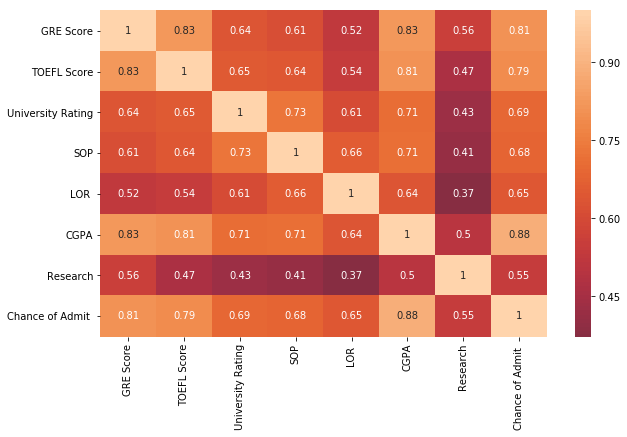

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, annot=True)

Semakin terang warna sel menunjukkan nilai korelasi yang semakin besar. Berdasarkan heatmap tersebut diketahui CGPA berkorelasi kuat terhadap Chance of Admit dengan koefisien korelasi sebesar 0,88. Selanjutnya akan dicari model regresi linear sederhana dengan CGPA sebagai variabel bebas (x) dan Chance of Admit sebagai variabel terikat (y).

# Scatter Plot

In [46]:
data2=data.filter(items=['CGPA','Chance of Admit '])
data2.head()

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


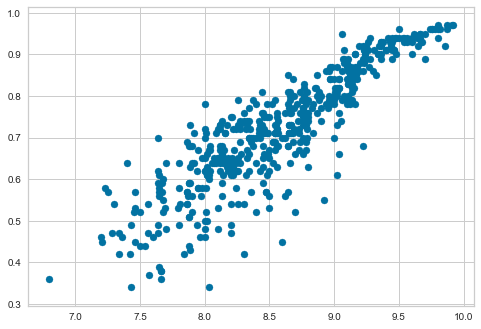

In [53]:
#scatter plot antara 'CGPA' dan 'CHANCE OF ADMIT'
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.show()

Berdasarkan scatter plot diketahui bahwa dataset memiliki outlier sehingga harus dilakukan data cleaning

# Menghilangkan Outlier

In [5]:
#mendeteksi ooutlier
rataratagpa=data['CGPA'].mean()
stdgpa=data['CGPA'].std()
rataratapeluang=data['Chance of Admit '].mean()
stdpeluang=data['Chance of Admit '].std()

#menghapus outlier dengan menggunakan Zscore dengan threshold bernilai 2
databersih=data[(np.abs((data['CGPA']-rataratagpa)/stdgpa)<=2)
               & (np.abs((data['Chance of Admit ']-rataratapeluang)/stdpeluang)<=2)]

databersih.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


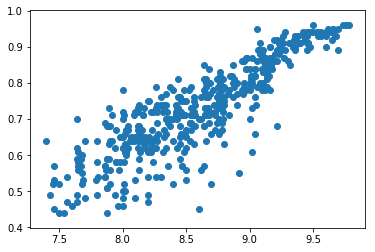

In [19]:
#scatter plot antara 'CGPA' dan 'CHANCE OF ADMIT'
plt.scatter(databersih['CGPA'],databersih['Chance of Admit '])
plt.show()

# SIMPLE REGRESSION

In [10]:
data2=databersih.filter(items=['CGPA','Chance of Admit '])
data2.head()

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [11]:
x = data2['CGPA'].values.reshape(-1,1)
y = data2['Chance of Admit '].values.reshape(-1,1)

Kemudian dilakukan pemisahan dataset menjadi data train dan data test dengan data test sebanyak 1/3 bagian.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/3,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print('intercept:',regressor.intercept_)
print('slope:',regressor.coef_)

intercept: [-1.0277074]
slope: [[0.20429778]]


berdasarkan perhitungan diatas diperoleh seperti berikut: y = 0.20429778x-1.0277074. Ini berarti untuk setiap perubahan satu satuan pada 'CGPA' akan meningkatkan 'Chance of Admit' sebesar 0.20429778


In [15]:
y_pred = regressor.predict(x_test)

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.69,0.578073
1,0.72,0.755812
2,0.70,0.688394
3,0.66,0.700652
4,0.85,0.835488
5,0.94,0.919250
6,0.81,0.737425
7,0.79,0.659792
8,0.64,0.651620
9,0.52,0.494311


# Validasi Model

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_pred-y_test)))
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_test, y_pred))

Mean absolute error: 0.05
MSE: 0.0040
R2-score: 0.75


# Clustering

In [6]:
X=databersih.filter(items=['GRE Score','Chance of Admit '])
X.head()

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


In [7]:
X=X.values

In [23]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [9]:
## Menggunakan metode elbow untuk menentukan angka cluster yang tepat
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

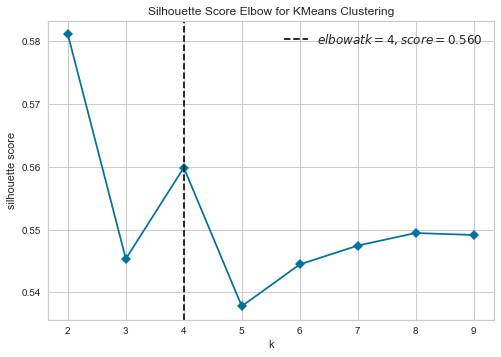

In [10]:
#fit data dan visualisasi
visualizer.fit(X)    
visualizer.poof()

Berdasarkan visualisasi, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 4 dan pada saat k=4 diperoleh nilai shilhoutte tertinggi. Oleh karena itu, dapat tentukan bahwa jumlah K yang baik adalah 4.

In [11]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [12]:
#nilai centroid pada tiap cluster
print(kmeans.cluster_centers_)

[[323.36666667   0.79133333]
 [301.49494949   0.59979798]
 [333.33333333   0.90833333]
 [313.20645161   0.67864516]]


In [14]:
print(kmeans.labels_)

[2 0 3 0 3 2 0 3 1 0 0 0 0 1 3 3 3 0 3 1 3 0 0 2 2 0 1 1 0 2 2 0 1 1 1 1 3
 3 3 2 0 0 2 2 0 0 3 3 2 0 0 0 3 1 3 1 1 3 0 0 0 3 3 0 2 2 0 3 3 2 0 1 1 3
 2 0 0 2 0 3 3 3 3 3 1 1 2 2 0 0 3 3 3 0 3 2 2 2 1 1 0 1 0 3 3 1 1 0 2 2 3
 3 1 1 0 0 0 2 2 1 3 0 2 3 3 3 0 3 2 2 2 0 0 3 0 3 2 2 0 0 0 3 3 3 1 1 3 1
 3 3 2 0 1 3 1 3 3 2 0 0 0 0 2 0 3 1 1 1 1 3 3 0 3 2 2 0 0 0 0 2 3 1 1 3 3
 3 3 3 1 1 3 3 1 1 0 0 2 2 2 2 0 0 0 3 3 3 0 3 1 1 1 3 3 0 3 0 3 1 2 0 0 2
 3 1 1 3 0 0 3 0 3 3 0 0 0 3 3 2 0 1 3 0 0 2 0 3 3 0 0 3 3 3 0 3 1 1 1 3 3
 0 2 0 3 1 3 3 3 0 2 2 2 0 3 3 1 1 1 3 3 3 3 0 2 1 3 0 0 0 3 0 0 0 3 3 0 0
 3 1 1 3 1 1 0 0 3 0 3 1 3 0 1 1 0 0 3 3 0 3 0 0 2 0 0 3 0 3 1 3 1 3 3 0 1
 1 1 3 0 1 3 0 0 2 2 1 3 2 0 3 1 1 3 0 2 0 1 1 3 0 0 0 1 2 1 1 1 0 3 3 0 3
 2 0 0 2 3 2 1 3 0 2 3 1 0 1 1 1 1 3 3 3 0 0 3 3 3 3 0 0 2 0 3 3 3 2 3 0 0
 3 1 3 3 3 3 1 2 2 0 0 0 0 0 3 3 0 0 0 0 3 1 1 3 2 0 1 1 1 1 3 3 0 0 0 3 0
 3 3 1 1 3 3 0 0 0 0 1 3 3 0 0 0 1 1 1 1 1 1 2 2 3 0]


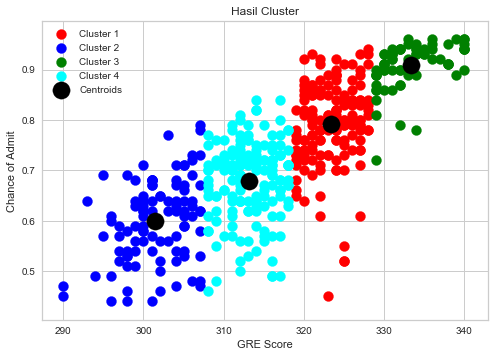

In [13]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Hasil Cluster')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

Berdasarkan gambar tersebut diketahui bahwa terdapat empat cluster yang dikelompokkan berdasarkan 4 kelompok nilai dalam GRE Score yaitu
1. Dibawah 309
2. Diantara 309-319
3. Diantara 319-329
4. Diatas 329

Semakin besar GRE Score maka semakin besar kesempatan untuk diterima

pengelompokan ini bisa digunakan sebagai passing grade untuk masuk ke program Master dan membantu melihat seberapa peluang mereka untuk diterima pada program tersebut.